In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd

In [74]:
df = pd.read_csv('../../mogi_after_parsing.csv')
df.head()

,title,description,property_type,transaction_type,price,province,district,ward,street,location_latitude,location_longitude,owner_name,owner_contact,area,bedrooms,bathrooms
0,Khai Trương Căn Hộ Dịch Vụ 1 Phòng Ngủ_Full Nộ...,Khai Trương Căn Hộ Dịch Vụ 1 Phòng Ngủ_Full Nộ...,room,rent,5.5,TPHCM,10,12,Trần Thiện Chánh,106.672699,10.773972,Kim Dung,833579938,30.0,1,1
1,Cho thuê phòng trọ giá rẻ đầy đủ tiện nghi nga...,Trống sẵn Studio đầy đủ tiện nghi giá siu hạt ...,room,rent,6.0,TPHCM,1,Bến Thành,Lý Tự Trọng,106.637199,10.827998,Hải Yến Hynni Unite,912393491,25.0,0,0
2,"Cho thuê nhà 1 trệt 2 lầu ST đường Bình Lợi, D...","Cần cho thuê nhà đường Bình Lợi, phường 13, qu...",room,rent,18.0,TPHCM,Bình Thạnh,13,Bình Lợi,106.704235,10.827872,Nguyễn Đăng Yên,909513569,NaN,4,5
3,"Nhà nguyên căn mới, 3pn, 1PK, 2 wc chỉ 3tr5",CHO THUÊ NHÀ NGUYÊN CĂN Nhà ở Lê Văn Lương Nh...,room,rent,3.5,TPHCM,Nhà Bè,Nhơn Đức,2009 Lê Văn Lương,106.703880,10.671457,Kim Cúc,909634270,50.0,3,2
4,"Chính chủ Full nội thất, Mới 100%, 26m2, Thang...",CHÍNH CHỦ CHO THUÊ CĂN HỘ MINI CAO CẤP - GẦN C...,room,rent,6.0,TPHCM,Bình Thạnh,5,Nguyễn Thượng Hiền,106.685545,10.813147,Nguyễn Ngọc Vinh,938747343,24.0,1,1


# Data exploration

In [75]:
# Drop columns that are not needed
df.drop(['title', 'description', 'transaction_type', 'owner_name', 'owner_contact', 'property_type', 'street'], axis=1, inplace=True)
df.head()

,price,province,district,ward,location_latitude,location_longitude,area,bedrooms,bathrooms
0,5.5,TPHCM,10,12,106.672699,10.773972,30.0,1,1
1,6.0,TPHCM,1,Bến Thành,106.637199,10.827998,25.0,0,0
2,18.0,TPHCM,Bình Thạnh,13,106.704235,10.827872,NaN,4,5
3,3.5,TPHCM,Nhà Bè,Nhơn Đức,106.703880,10.671457,50.0,3,2
4,6.0,TPHCM,Bình Thạnh,5,106.685545,10.813147,24.0,1,1


In [76]:
df.shape

(2448, 9)

In [77]:
df.keys()

Index(['price', 'province', 'district', 'ward', 'location_latitude',
       'location_longitude', 'area', 'bedrooms', 'bathrooms'],
      dtype='object')

In [78]:
# Check Nan values in df and remove it
df.isnull().sum()
df.dropna(inplace=True)


# Data visualization

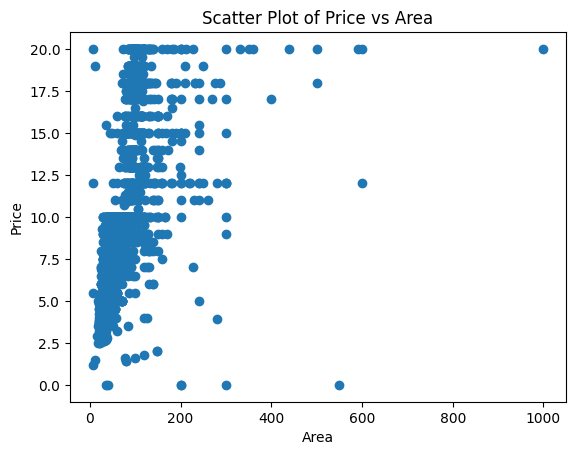

In [79]:
plt.scatter(df['area'], df['price'])
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Scatter Plot of Price vs Area')
plt.show()


# Data processing

In [80]:
# Change "quận 2" and "Quận 2 (Tp Thủ Đức)" to "Quận 2"
df['district'] = df['district'].replace('Quận 2 (Tp Thủ Đức)', 'Quận 2')

In [81]:
# Change province, ward, street from categorical to numerical value
from sklearn.preprocessing import LabelEncoder

le_district = LabelEncoder()
le_province = LabelEncoder()
le_ward = LabelEncoder()

df["district"] = le_district.fit_transform(df['district'])
df["province"] = le_province.fit_transform(df['province'])
df["ward"] = le_ward.fit_transform(df['ward'])
df.head()

,price,province,district,ward,location_latitude,location_longitude,area,bedrooms,bathrooms
0,5.5,6,1,3,106.672699,10.773972,30.0,1,1
1,6.0,6,0,51,106.637199,10.827998,25.0,0,0
3,3.5,6,27,98,106.703880,10.671457,50.0,3,2
4,6.0,6,15,21,106.685545,10.813147,24.0,1,1
5,5.0,6,9,147,106.724586,10.725280,40.0,1,1


In [82]:
# Spilt data into training and testing dataset
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

# RANDOM FOREST ALGORITHM

In [83]:
re_model = RandomForestRegressor(n_estimators=100, random_state=42)
re_model.fit(X_train, y_train)
y_pred = re_model.predict(X_test)
y_pred

array([11.85146089,  5.82083333,  6.34191   ,  7.35872667,  5.59344333,
        9.13024   ,  9.4535    ,  8.88825   , 18.1755    ,  9.70414078,
        8.80604607, 19.015     ,  4.26175   ,  9.365     ,  9.0288302 ,
       18.43911867,  9.19358333,  5.23575   ,  5.47009091,  9.29232475,
       16.54725   , 15.077     , 12.98734   ,  4.99906546,  8.96348879,
        9.70414078,  6.73779762, 11.15994   ,  8.66265728, 13.413     ,
        5.57566667, 14.51521825,  9.901     , 10.61155487, 18.78306349,
       18.31575672, 13.03196113,  9.20106936,  5.40883333, 12.79870727,
        5.85266667, 18.31815333, 17.39      ,  7.245     ,  8.9635175 ,
        8.92875   , 16.0298312 ,  3.98939333,  8.7955    , 16.89771   ,
       10.93586789,  8.68395119,  8.73738642,  9.6075    ,  9.07738095,
       18.01      ,  2.634     ,  7.04592857, 18.48944   ,  8.77208333,
        5.39888333,  9.41203333, 17.51266667,  5.07491667,  9.72105952,
        9.34303167,  7.98068333,  8.82944048,  4.89103345, 18.90

# Evaluation

In [84]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

# Predict the target variable
y_pred = re_model.predict(X_test)

print('---Random Forest Regressor---')

# Calculate the MAE
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error (MAE):', mae)

# Calculate the MSE
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE):', mse)

# Calculate the RSqared
rsquared = r2_score(y_test, y_pred)
print('R-squared:', rsquared)

# Calculate the RMSE
rmse = np.sqrt(mse)
print('Root Mean Squared Error (RMSE):', rmse)


---Random Forest Regressor---
Mean Absolute Error (MAE): 1.0070707977703728
Mean Squared Error (MSE): 1.9644093309065576
R-squared: 0.9152009031492347
Root Mean Squared Error (RMSE): 1.4015738763641956


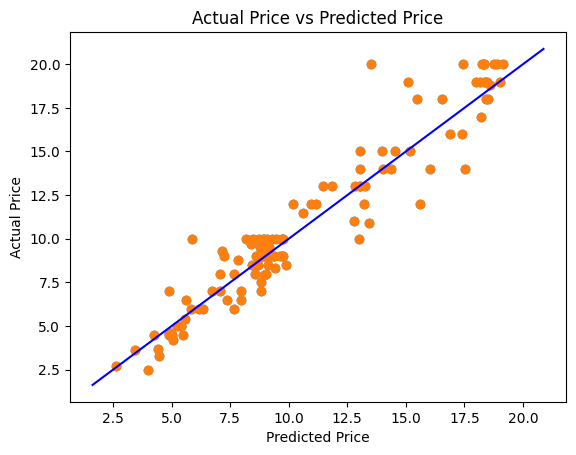

In [85]:
# do a scatter plot of the predicted price vs the actual price
plt.scatter(y_pred, y_test)
plt.ylabel('Actual Price')
import matplotlib.pyplot as plt



plt.scatter(y_pred, y_test)
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Actual Price vs Predicted Price')

limits = [np.min([plt.xlim(), plt.ylim()]),  # min of both axes
          np.max([plt.xlim(), plt.ylim()])]  # max of both axes

plt.plot(limits, limits, 'b-')  # 'b-' means blue color, solid line


plt.xlim()
plt.ylim()
plt.show()

In [86]:
compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
compare.head(20)

,Actual,Predicted
1448,13.000,11.851461
684,6.000,5.820833
2085,6.000,6.341910
825,6.500,7.358727
1980,6.500,5.593443
359,8.500,9.130240
1358,10.000,9.453500
116,9.999,8.888250
1098,19.000,18.175500
1513,9.000,9.704141


# KNN ALGORITHM

In [87]:
# Choose n_neighbors
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1, 50)}

knn = KNeighborsRegressor()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X_train, y_train)

print(knn_cv.best_params_)

{'n_neighbors': 4}


In [88]:
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [89]:
# # KNN Regressor
# knn_model = KNeighborsRegressor(n_neighbors=knn_cv.best_params_['n_neighbors'])
# knn_model.fit(X_train, y_train)
y_pred = knn_cv.predict(X_test)
y_pred

array([12.25   ,  4.7    ,  6.87475,  5.5    ,  6.375  ,  8.5    ,
        9.     ,  9.     , 18.5    ,  9.75   ,  9.     , 19.25   ,
        5.125  , 10.25   ,  9.775  , 18.     ,  9.75   ,  5.55   ,
        5.     ,  9.75   , 14.5    , 10.5    ,  9.99925,  5.12475,
        8.7245 ,  9.75   ,  7.     , 13.75   ,  8.5    , 10.775  ,
        4.925  , 14.5    ,  8.45   , 11.375  , 19.     , 18.245  ,
       13.25   ,  9.     ,  6.875  , 17.375  ,  6.275  , 14.47475,
       14.25   ,  8.     ,  9.     ,  9.525  , 11.5    ,  4.775  ,
        8.55   , 11.375  , 11.875  ,  8.875  ,  8.75   ,  9.875  ,
        9.5    , 18.     ,  2.95   ,  7.625  , 14.47475,  8.87475,
        5.475  ,  9.3    , 18.75   ,  6.1    , 10.     ,  8.625  ,
        7.775  ,  8.375  ,  4.45   , 18.975  ,  9.875  ,  8.25   ,
        3.725  , 13.25   ,  6.35   , 13.5    , 14.     ,  9.2    ,
       18.875  ,  4.725  , 16.75   , 14.625  ,  8.175  , 12.     ,
       19.25   ,  4.55   ,  7.4    ,  8.75   , 13.25   , 14.  

In [90]:
X_test.head()

,province,district,ward,location_latitude,location_longitude,area,bedrooms,bathrooms
1448,6,27,107,106.709872,10.709383,94.0,3,3
684,6,5,20,106.682941,10.773942,25.0,1,1
2085,6,37,1,106.646320,10.781394,35.0,1,1
825,6,9,148,106.709755,10.741930,45.0,2,1
1980,8,30,120,106.866330,10.954742,53.0,2,2


In [91]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('---KNN Regressor---')

# Calculate the MAE
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error (MAE):', mae)

# Calculate the MSE
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE):', mse)

# Calculate the RSqared
rsquared = r2_score(y_test, y_pred)
print('R-squared:', rsquared)

# Calculate the RMSE
rmse = np.sqrt(mse)
print('Root Mean Squared Error (RMSE):', rmse)

---KNN Regressor---
Mean Absolute Error (MAE): 1.3674194915254239
Mean Squared Error (MSE): 4.636824496822034
R-squared: 0.7998387996840991
Root Mean Squared Error (RMSE): 2.1533287015274825


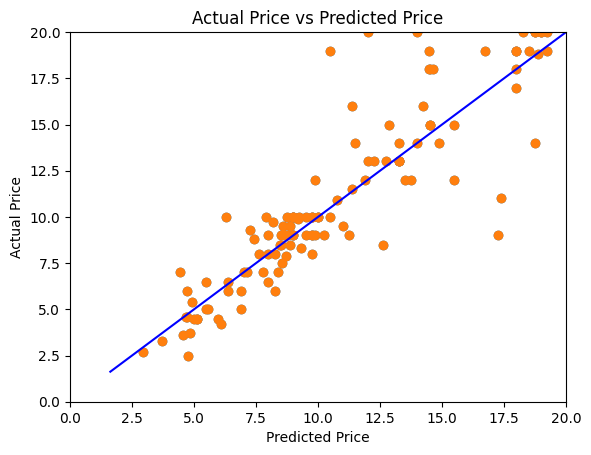

In [92]:
# do a scatter plot of the predicted price vs the actual price
plt.scatter(y_pred, y_test)
plt.ylabel('Actual Price')
import matplotlib.pyplot as plt

plt.scatter(y_pred, y_test)
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Actual Price vs Predicted Price')

limits = [np.min([plt.xlim(), plt.ylim()]),  # min of both axes
          np.max([plt.xlim(), plt.ylim()])]  # max of both axes

plt.plot(limits, limits, 'b-')  # 'b-' means blue color, solid line


plt.xlim(0, 20)
plt.ylim(0, 20)
plt.show()

In [93]:
compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
compare.head(20)

,Actual,Predicted
1448,13.000,12.25000
684,6.000,4.70000
2085,6.000,6.87475
825,6.500,5.50000
1980,6.500,6.37500
359,8.500,8.50000
1358,10.000,9.00000
116,9.999,9.00000
1098,19.000,18.50000
1513,9.000,9.75000


In [96]:
# Save the models into pickle file
import pickle

with open('re_model.pkl', 'wb') as f:
		pickle.dump(re_model, f)

encoders = {
	'le_district': le_district,
	'le_province': le_province,
	'le_ward': le_ward
}
with open('label_encoder.pkl', 'wb') as f:
		pickle.dump(encoders, f)